# installing files

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install tensorflow_text

Defaulting to user installation because normal site-packages is not writeable


# preprocessing data

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [5]:
import pandas as pd
df = pd.read_csv("spam.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df.groupby('label').describe()

Unnamed: 0                                                         \
           count    mean          std     min      25%     50%      75%   
label                                                                     
ham       3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25   
spam      1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50   

              label_num                                     
          max     count mean  std  min  25%  50%  75%  max  
label                                                       
ham    3671.0    3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
spam   5170.0    1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [7]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [8]:
df_spam = df[df['label']== 'spam']
df_spam.shape

(1499, 4)

In [9]:
df_ham = df[df['label']== 'ham']
df_ham.shape

(3672, 4)

# downsampling 

In [40]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(1499, 4)

In [41]:
df_balanced = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(2998, 4)

In [42]:
df_balanced['label'].value_counts()
df_balanced.sample(5)

,Unnamed: 0,label,text,label_num
3439,3902,spam,Subject: just a thought\r\non tkns\r\nor the s...,1
1461,4361,spam,Subject: sex that hurts - stretch till they sq...,1
4398,4504,spam,Subject: fwd : [ centimeters ] 64 % - off vico...,1
2493,3713,spam,Subject: learn to make a fortune on ebay !\r\n,1
4987,4905,spam,Subject: live large - rolex replicas online !\...,1


# train, test, split

In [43]:
df_balanced['spam'] = df_balanced['label'].apply(lambda x:1 if x== 'spam' else 0)
df_balanced.sample(5)

,Unnamed: 0,label,text,label_num,spam
4239,2400,ham,Subject: your amazon . com order ( # 104 - 967...,0,0
333,4200,spam,Subject: vietnam\r\nphysiotherapy agnes .\r\n@...,1,1
5152,4778,spam,Subject: oxyyyyconttin no script needeeed\r\n{...,1,1
3360,988,ham,Subject: ei 314 revised availability effective...,0,0
1107,1136,ham,"Subject: hpl noms for july 6 , 2000\r\n( see a...",0,0


In [44]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'],df_balanced['spam'],stratify = df_balanced['spam'])


In [46]:
X_train.head(4)

3745    Subject: miningnews . net newsletter - friday ...
2082    Subject: re :\r\nyour needed soffttwares at ro...
3790    Subject: mcmullen outage\r\n- - - - - - - - - ...
2445    Subject: randal , i can help you\r\never been ...
Name: text, dtype: object

In [47]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [48]:
def get_sentence_embedding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']
get_sentence_embedding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleyball game tommorrow?"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.843517  , -0.5132724 , -0.8884571 , ..., -0.7474883 ,
        -0.75314736,  0.91964495],
       [-0.8127742 , -0.47144204, -0.8961091 , ..., -0.70256007,
        -0.65957814,  0.83574665]], dtype=float32)>

In [49]:
e = get_sentence_embedding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon mask",
    "bill gates"
])

In [50]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606918 , -0.14219393,  0.49604616, ...,  0.42165297,
        -0.5322141 ,  0.8031217 ],
       [-0.86023206, -0.21242923,  0.4915701 , ...,  0.397981  ,
        -0.6050628 ,  0.8447163 ],
       [-0.71288633, -0.1546394 ,  0.38401547, ...,  0.35278675,
        -0.5099136 ,  0.7347412 ],
       [-0.82533467, -0.35550585, -0.5906973 , ..., -0.01613814,
        -0.6141758 ,  0.87230283],
       [-0.896728  , -0.42045638, -0.38606536, ..., -0.13229051,
        -0.66669166,  0.9103785 ],
       [-0.7854439 , -0.299497  ,  0.4102738 , ...,  0.52225393,
        -0.4957358 ,  0.8150753 ]], dtype=float32)>

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[3],e[4]])

array([[1.       , 0.9800436],
       [0.9800436, 0.9999998]], dtype=float32)

In [52]:
text_input = tf.keras.layers.Input(shape= (),dtype= tf.string,name = "text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)


l = tf.keras.layers.Dropout(0.1,name = 'dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(l)


model = tf.keras.Model(inputs = [text_input], outputs = [l])

In [53]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [54]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall')
]

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = METRICS)

In [55]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
71/71 [==============================] - 2358s 33s/step - loss: 0.6305 - accuracy: 0.6481 - precision: 0.6593 - recall: 0.6130
Epoch 2/10
71/71 [==============================] - 2250s 32s/step - loss: 0.5611 - accuracy: 0.7109 - precision: 0.7170 - recall: 0.6966
Epoch 3/10
71/71 [==============================] - 2215s 31s/step - loss: 0.5208 - accuracy: 0.7469 - precision: 0.7581 - recall: 0.7251
Epoch 4/10
71/71 [==============================] - 2329s 33s/step - loss: 0.4800 - accuracy: 0.7909 - precision: 0.8079 - recall: 0.7633
Epoch 5/10
71/71 [==============================] - 2272s 32s/step - loss: 0.4467 - accuracy: 0.8203 - precision: 0.8285 - recall: 0.8078
Epoch 6/10
71/71 [==============================] - 2261s 32s/step - loss: 0.4256 - accuracy: 0.8376 - precision: 0.8434 - recall: 0.8292
Epoch 7/10
71/71 [==============================] - 2250s 32s/step - loss: 0.4047 - accuracy: 0.8528 - precision: 0.8569 - recall: 0.8470
Epoch 8/10
71/71 [================

In [56]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 995s 41s/step - loss: 0.3288 - accuracy: 0.8973 - precision: 0.9071 - recall: 0.8853


[0.3287537395954132,
 0.8973333239555359,
 0.9071038365364075,
 0.8853333592414856]

In [57]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [58]:
import numpy as np

In [59]:
y_predicted = np.where(y_predicted>0.5, 1 , 0)


In [60]:
y_predicted

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_predicted)

In [62]:
cm

array([[341,  34],
       [ 43, 332]])

Text(33.0, 0.5, 'Truth')

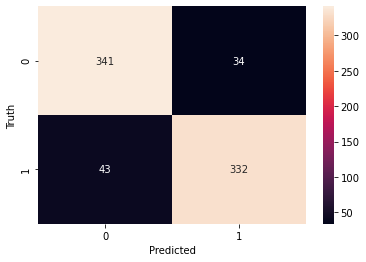

In [63]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       375
           1       0.90      0.80      0.85       375

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.86      0.86       750

